In [18]:
import numpy as np
import matplotlib.pyplot as plt

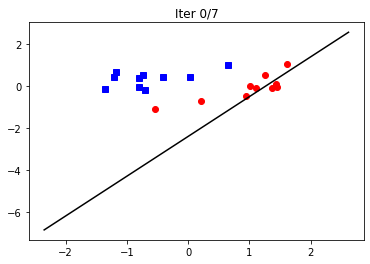

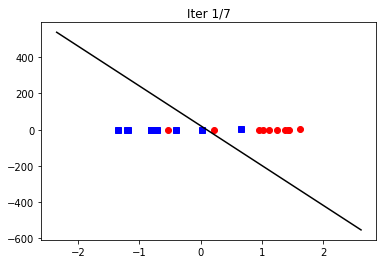

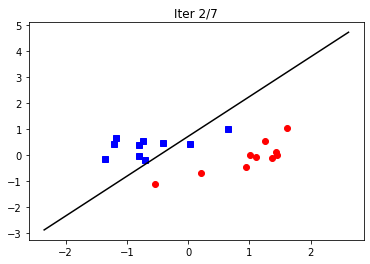

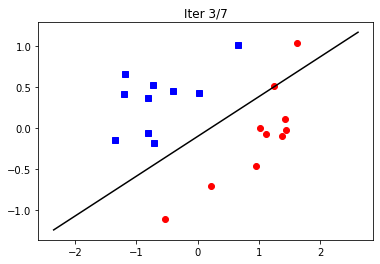

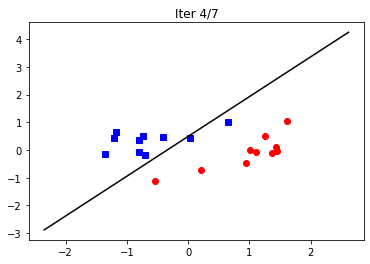

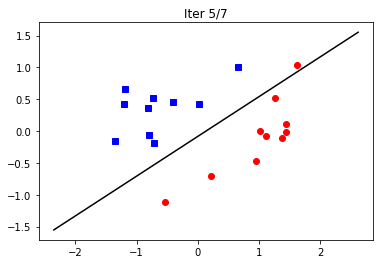

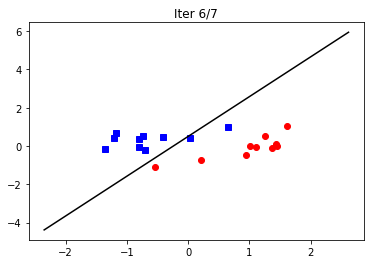

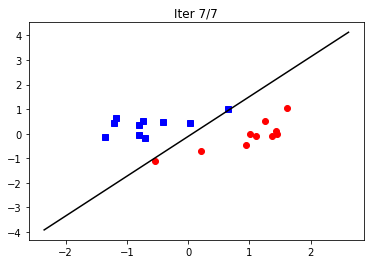

In [28]:
def predict(w, X):
    return np.sign(X.dot(w))

def perceptron(X, y, w_init):
    w = [w_init]
    it = 0
    while(True):
        pred = predict(w[-1], X)
        # Find indexes of misclassified points
        mis_idxs = np.where(np.equal(pred, y) == False)[0]
        # Number of misclassified points
        num_mis = mis_idxs.shape[0]
        if num_mis == 0:
            return w, it
        # Randomly pick one misclassified point
        random_id = np.random.choice(mis_idxs, 1)[0]
        # Update 
        w_new = w[-1] + y[random_id]*X[random_id]
        w.append(w_new)
        it = it + 1

def plot(X, w, i, it):
    N = X.shape[0]
    plt.plot(X[:N//2, 0], X[:N//2, 1], 'bs')
    plt.plot(X[N//2:, 0], X[N//2:, 1], 'ro')
    x_plot = np.array([np.amin(X) - 1, np.amax(X) + 1])
    y_plot = -w[i][1]/w[i][2]*x_plot - w[i][0]/w[i][2]
    plt.plot(x_plot, y_plot, 'k-' )
    plt.title('Iter %d/%d' %(i, it))
    plt.show()
    
    
means = [[-1, 0], [1, 0]]
cov = [[0.3, 0.2], [0.2, 0.3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X = np.concatenate((X0, X1), axis=0)
y = np.concatenate((np.ones(N), -1*np.ones(N)))
Xbar = np.concatenate((np.ones((2*N, 1)), X), axis=1)
w_init = np.random.randn(Xbar.shape[1])
w, it = perceptron(Xbar, y, w_init)

for i in range(it + 1):
    plot(X, w, i, it)